# Python для визуализации данных

*Рогович Татьяна, ВШЭ*

## Упраженения

Первые три задания работаем с набором данных, который содержит всех новорожденных и их имена в CША. Последние два задания делаем на уже известном вам датасете про индийских женщин и диабет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt')
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')

In [2]:
babies = babies.set_index('Unnamed: 0')
babies.tail()

,name,sex,number,year
Unnamed: 0,,,,
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет


In [4]:
babies.groupby('year').year.count()

year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2006    34039
2007    34883
2008    35006
2009    34602
2010    33838
Name: year, Length: 131, dtype: int64

In [5]:
2010-1880+1

131

Все годы с 1880 по 2010 год без пропусков

2) Какое имя в датасете находится по индексом 121?

In [6]:
babies.name.iloc[121]

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [7]:
babies[babies.name == 'Aaron'].number.sum()

527668

4) Насколько больше за все время родилось мальчиков чем девочек?

In [8]:
babies.groupby('sex').number.sum()

sex
F    159990140
M    162412587
Name: number, dtype: int64

In [9]:
f"Мальчиков родилось на {babies[babies.sex == 'M'].number.sum() - babies[babies.sex == 'F'].number.sum()} больше"

'Мальчиков родилось на 2422447 больше'

5) Cколько мальчиков родилось в 2010?

In [10]:
babies[(babies.sex == 'M') & (babies.year == 2010)].number.sum()

1898382

6) Сколько в датасете девочек по имени John?

In [11]:
babies[(babies.sex == 'F') & (babies.name == 'John')].number.sum()

21578

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


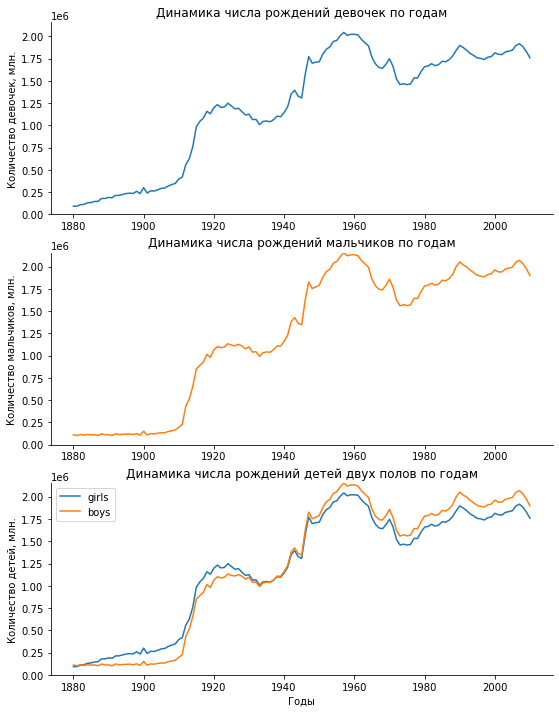

In [12]:
babies_girls = babies[(babies.sex == 'F')].groupby(['year']).agg('sum')
babies_boys = babies[(babies.sex != 'F')].groupby(['year']).agg('sum')


fig, axs = plt.subplots(3, 1, figsize=(9, 12))
axs[0].plot(babies_girls.index, babies_girls.number, color="tab:blue")
axs[0].title.set_text('Динамика числа рождений девочек по годам')

axs[1].plot(babies_boys.index, babies_boys.number, color="tab:orange")
axs[1].title.set_text('Динамика числа рождений мальчиков по годам')


axs[2].plot(babies_girls.index, babies_girls.number, label='girls')
axs[2].plot(babies_boys.index, babies_boys.number, label='boys')
axs[2].legend()
axs[2].title.set_text('Динамика числа рождений детей двух полов по годам')


axs[0].set_ylabel('Количество девочек, млн.')
axs[1].set_ylabel('Количество мальчиков, млн.')
axs[2].set_ylabel('Количество детей, млн.')
axs[2].set_xlabel('Годы')

for i in range(3):  # оси ставлю всем
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    topside = axs[i].spines["top"]
    topside.set_visible(False)
    axs[i].set_ylim(0, max(max(babies_boys.number), max(babies_girls.number))) # лимит по у - максимум из значений детей в год

* первые три года с 1883 года рождалось больше мальчиков
* с 1883 до 1917 года рождаемость мальчиков была ниже, чем девочек.
* с 1917 года, разница сокращалась
* с 1927 года число родившихся мальчиков было больше, чем девочек и оставалось выше до 2010 года

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



           number
name             
Mary      4103935
Patricia  1568742
        number
name          
James  5049727
John   5040319


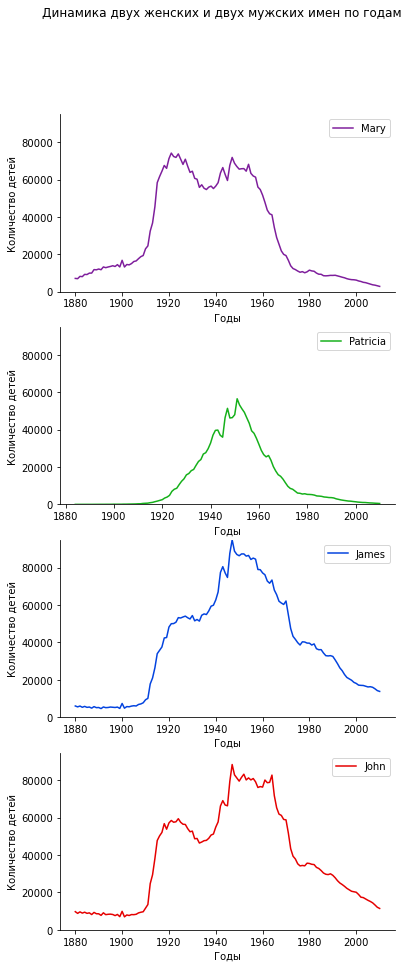

In [13]:
df_female = pd.DataFrame(babies[(babies.sex == 'F')].groupby("name").number.agg("sum"))
top2w = df_female.sort_values(by=['number'],  ascending=False).iloc[:2]
print(top2w)
girls_top = top2w.index # имена - индексы этого дф, берем их как отдельный списко

df_male = pd.DataFrame(babies[(babies.sex != 'F')].groupby("name").number.agg("sum"))
top2m = df_male.sort_values(by=['number'],  ascending=False).iloc[:2]
print(top2m)
boys_top = top2m.index # аналогично берем имена мальчиков

# делаем дф, где только динамика по годам для 1 имени
# boys
babies_m1 = babies[(babies.name == boys_top[0])].groupby(['year']).agg('sum')
babies_m2 = babies[(babies.name == boys_top[1])].groupby(['year']).agg('sum')
# girls
babies_w1 = babies[(babies.name == girls_top[0])].groupby(['year']).agg('sum')
babies_w2 = babies[(babies.name == girls_top[1])].groupby(['year']).agg('sum')

# count limit for y
ylimit_num = max(max(babies_m1.number), max(babies_m2.number), max(babies_w1.number), max(babies_w2.number))



fig, axs = plt.subplots(4, 1, figsize=(6, 15))
axs[0].plot(babies_w1.index, babies_w1.number, color="xkcd:purple", label = girls_top[0]) 
axs[1].plot(babies_w2.index, babies_w2.number, color="xkcd:green", label = girls_top[1]) 
axs[2].plot(babies_m1.index, babies_m1.number, color="xkcd:blue", label = boys_top[0]) 
axs[3].plot(babies_m2.index, babies_m2.number, color="xkcd:red", label = boys_top[1]) 

fig.suptitle('Динамика двух женских и двух мужских имен по годам')  # общая подпись


for i in range(4):  # оси ставлю всем
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    topside = axs[i].spines["top"]
    topside.set_visible(False)
    axs[i].set_ylim(0, ylimit_num) # лимит по у - максимум из значений детей в год
    axs[i].set_ylabel('Количество детей')
    axs[i].set_xlabel('Годы')
    axs[i].legend()


* интересное наблюдение, неожиданное до рассмотрения динамики - самые популярные имена - не те, у кого был максимальный пик, а те, которые были популярны на длительном интервале
* среди топ 4 имен, мы видим, что для них пик популярности был в послевоенные годы (2 мировая война)
    * исключение - Мари, максимум популярности - в 1920-е годы
* для этих 4 имен характерно рост популярности в 1910-е годы и падение в 1980-е

## Задание 4

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

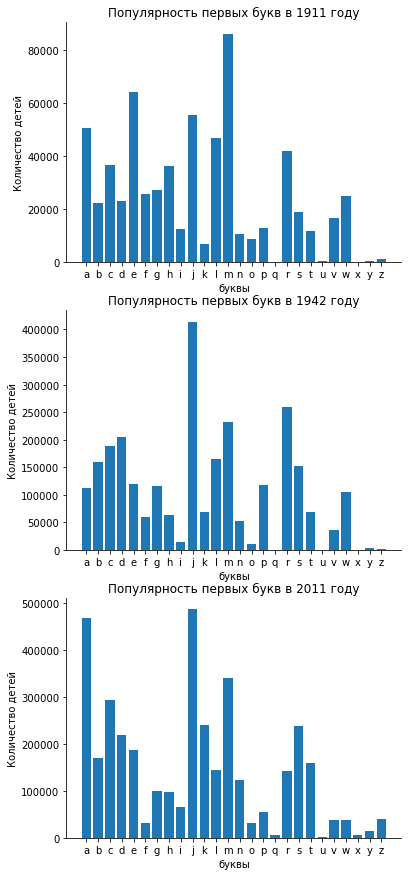

In [14]:
def one_letter(short_str):
    return short_str.lower()[:1]

babies['one_letter'] = babies.name.map(one_letter)  # make new column

# select and create counts
df1911 = pd.DataFrame(babies[babies.year == 1911].groupby("one_letter").number.agg("sum"))
df1942 = pd.DataFrame(babies[babies.year == 1942].groupby("one_letter").number.agg("sum"))
df2001 = pd.DataFrame(babies[babies.year == 2001].groupby("one_letter").number.agg("sum"))


total_count = pd.DataFrame(babies.groupby("one_letter").number.agg("sum")) # total counts - to get all combination


def edit_df(pandas_df):
    """function to leftjoin columns to total and return a fixed number of rows"""
    merged = total_count.join(pandas_df, how='left',lsuffix='_left')
    merged.drop("number_left", axis='columns', inplace=True)
    merged.replace(np.nan, 0, inplace=True)
    return merged

df1911 = edit_df(df1911)
df1942 = edit_df(df1942)
df2001 = edit_df(df2001)

# width = 0.35  # the width of the bars

fig, axs = plt.subplots(3, 1, figsize=(6, 15))
axs[0].bar(df1911.index, df1911.number)
axs[0].title.set_text('Популярность первых букв в 1911 году')

axs[1].bar(df1942.index, df1942.number)
axs[1].title.set_text('Популярность первых букв в 1942 году')

axs[2].bar(df2001.index, df2001.number)
axs[2].title.set_text('Популярность первых букв в 2011 году')

for i in range(3):  # оси ставлю всем
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    topside = axs[i].spines["top"]
    topside.set_visible(False)
    axs[i].set_ylabel('Количество детей')
    axs[i].set_xlabel('буквы')

In [15]:
print("Две первых буквы по популярности в именах в 1911 году:")
print(*df1911.sort_values(by=['number'],  ascending=False).iloc[:2].index, "\n")

print("Две первых буквы по популярности в именах в 1942 году:")
print(*df1942.sort_values(by=['number'],  ascending=False).iloc[:2].index, "\n")

print("Две первых буквы по популярности в именах в 2001 году:")
print(*df2001.sort_values(by=['number'],  ascending=False).iloc[:2].index)

Две первых буквы по популярности в именах в 1911 году:
m e 

Две первых буквы по популярности в именах в 1942 году:
j r 

Две первых буквы по популярности в именах в 2001 году:
j a


## Задание 5

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


In [16]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

## Дополнительное задание

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одни объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

In [17]:
new_pima = pima.groupby("Pregnancies")[["Glucose", "BMI"]].mean()
new_pima.columns = ['mean_glucose', 'mean_bmi']

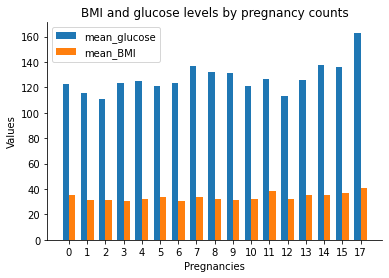

In [18]:
import numpy as np
labels = new_pima.index
glucose = new_pima.mean_glucose
bmi = new_pima.mean_bmi

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)

topside = ax.spines["top"]
topside.set_visible(False)

rects1 = ax.bar(x - width/2, glucose, width, label='mean_glucose')
rects2 = ax.bar(x + width/2, bmi, width, label='mean_BMI')
ax.set_ylabel('Values')
ax.set_xlabel('Pregnancies')
ax.set_title('BMI and glucose levels by pregnancy counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()